<a href="https://colab.research.google.com/github/Jayveersinh-Raj/intro_NLP_tensorflow/blob/main/Intro_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NLP funtamentals in TensorFlow

* NLP is used to derive information form natural language (Sequences, texts, speeches.

* Another common terms for NLP problems is Sequence to Sequence problems (seq2seq)

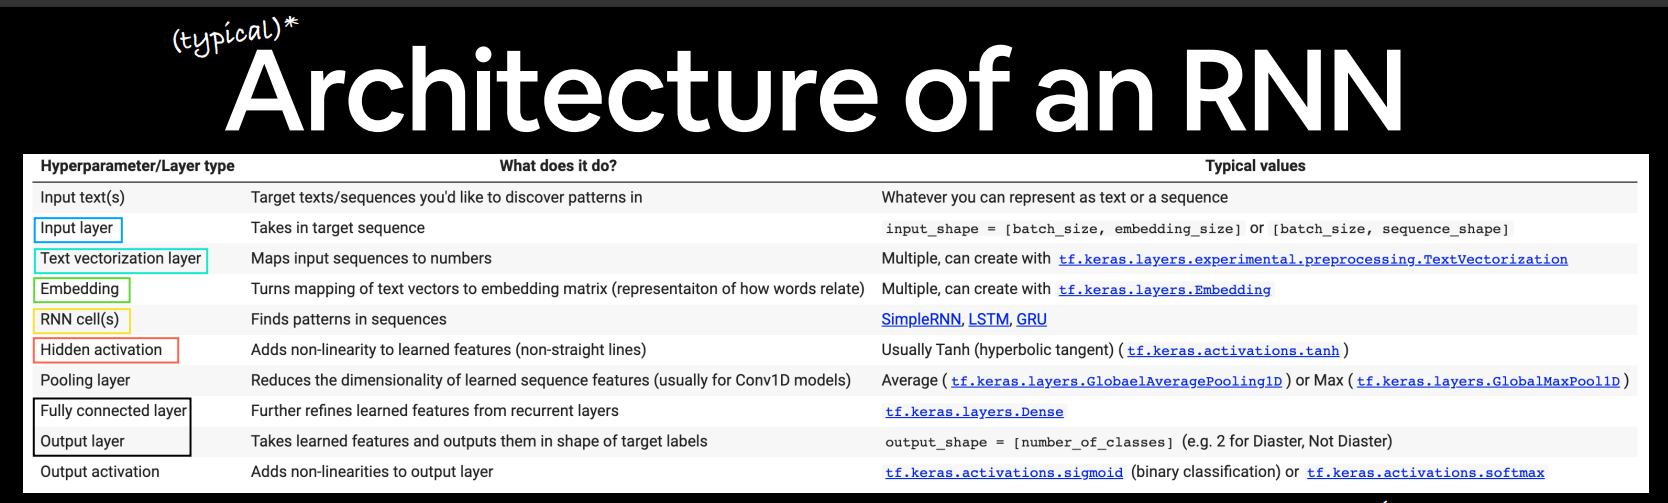

In [1]:
# We will need GPU to work with deep learning tasks such as NLP
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d95790f3-1089-fd7a-8c5d-a114687791ff)


In [2]:
# For more detailed info use without -L
!nvidia-smi

Sun Aug 21 14:14:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Lets import our helper functions
!wget https://raw.githubusercontent.com/Jayveersinh-Raj/helper_functions/main/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-08-21 14:14:46--  https://raw.githubusercontent.com/Jayveersinh-Raj/helper_functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-21 14:14:46 (107 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# Importing the dataset
Lets use Kaggle's Intro to NLP dataset

It is the text sample of tweets lablled as disasters or not disasters


In [4]:
# Lets get the data from google storage where Daniel has stored it
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip") # This is the name of the zip file that Daniel stored on google

--2022-08-21 14:14:49--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-08-21 14:14:49 (97.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualisation of the data
There are multiple ways:
* Python libraries to read and write files (refer [realpython](https://realpython.com))
* Pandas (But it would take up ram in colab)
* Using tensorflow to load text


In [5]:
import pandas as pd
data_train = pd.read_csv("train.csv")
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Lets shuffle the data using pandas method
shuffled_train = data_train.sample(frac = 1, random_state = 42) # frac = 1 means 100% of the data shuffle
shuffled_train.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# Lets see how test looks like
data_test = pd.read_csv("test.csv")
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# Lets shuffle this too
shuffled_test = data_test.sample(frac = 1, random_state = 42) # random state is always use while doing some random activity
shuffled_test.head()

,id,keyword,location,text
2406,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
134,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
411,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
203,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
889,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [9]:
# Lets see the value counts to see how many examples we have of each category
shuffled_train.target.value_counts() # Because target contains our categories

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# Lets visualize some random data to get the idea
import random
rand = random.randint(0, len(data_train)-3) # Not to exceed the total length
for i in shuffled_train[["text", "target"]][rand : rand+5 ].itertuples(): # because it will return dataframe as tuples
      _, text, target = i
      print(f"Target : {target}", "real disaster" if target > 0 else "not a diaster")
      print(f"Text : {text} \n")
      print("--- \n")
      

Target : 0 not a diaster
Text : Governor allows parole for California school bus hijacker | Fresno Linked Local Network http://t.co/Sww0QsMxVM http://t.co/bcdP4gKokA 

--- 

Target : 0 not a diaster
Text : Any new games coming soon @BreachGamingORG ? 

--- 

Target : 1 real disaster
Text : dust storm in riyadh ???? 

--- 

Target : 0 not a diaster
Text : organic natural horn stretcher expander earrings body jewelry with painting in tribal ... http://t.co/NvZdilRfgj http://t.co/u9Cd0txE7Z 

--- 

Target : 0 not a diaster
Text : Photo bombed ???? http://t.co/arTUMHmBhh 

--- 



In [11]:
# Lets split the data and get the validation set using sklearn
from sklearn.model_selection import train_test_split
train_lines, val_lines, train_labels, val_labels = train_test_split(shuffled_train["text"].to_numpy(),
                                                                    shuffled_train["target"].to_numpy(), 
                                                                    test_size = 0.1, # 10%
                                                                    random_state = 42)

* to_numpy() creates dataframe as numpy because sklearn requires them to be in numpy form

* Think of the above code as same as we did in linear regression. The 'shuffled_train["text"]" is X, and "shuffled_train["target"]" is Y

In [12]:
# lets check them and their lengths
len(train_lines), len(val_lines), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [13]:
# lets see the first 10 examples
import numpy as np
ten_ex = np.array([train_lines[:10],train_labels[:10]]).T
visual = pd.DataFrame(ten_ex, columns = ["Text", "Target"])

visual

,Text,Target
0,@mogacola @zamtriossu i screamed after hitting...,0
1,Imagine getting flattened by Kurt Zouma,0
2,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
3,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4,Somehow find you and I collide http://t.co/Ee8...,0
5,@EvaHanderek @MarleyKnysh great times until th...,1
6,destroy the free fandom honestly,1
7,Weapons stolen from National Guard Armory in N...,0
8,@wfaaweather Pete when will the heat wave pass...,1
9,Patient-reported outcomes in long-term survivo...,1


# Converting text to numbers
## Tokenization vs Embedding

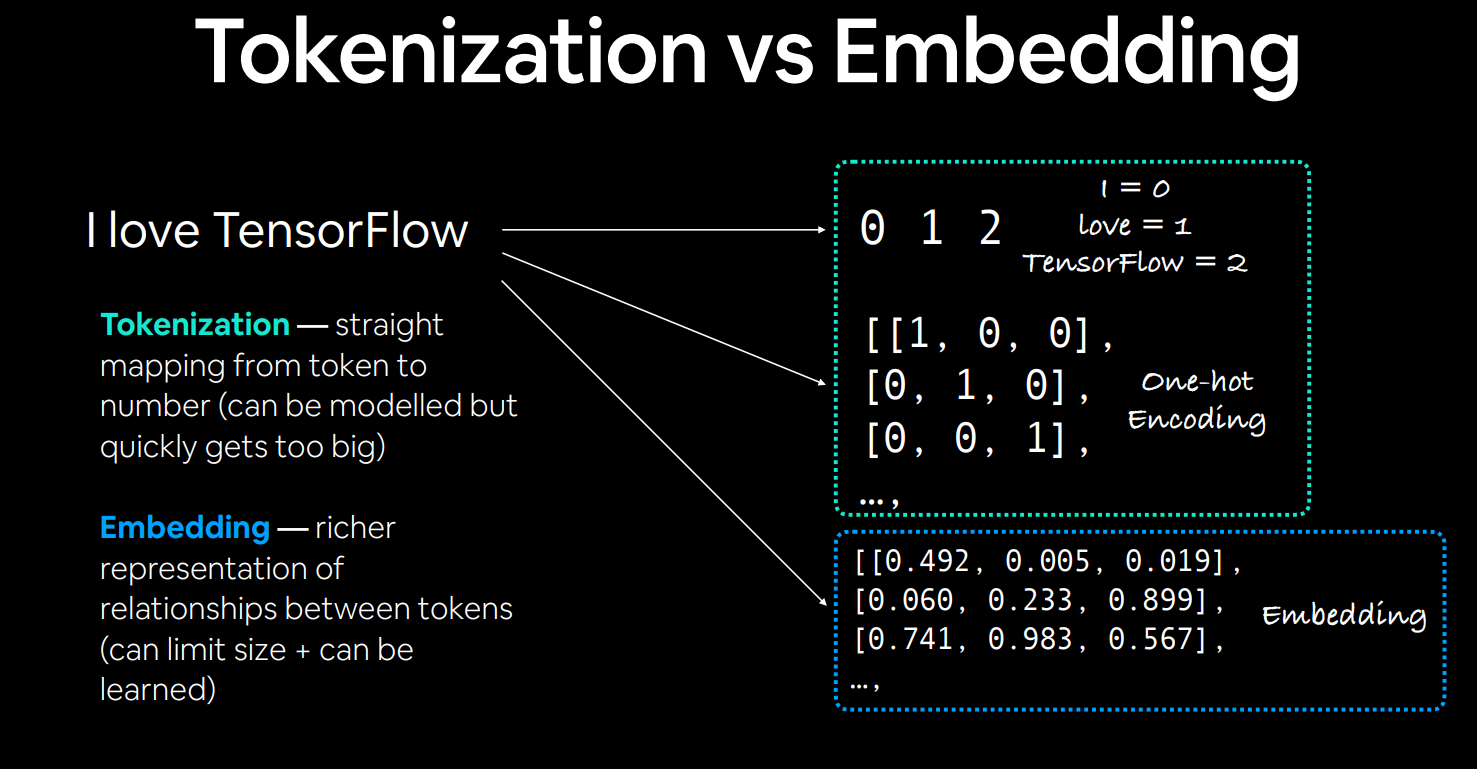

# More on tokenisation and embedding
* ### **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
1. **Using word-level** tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.

2. **Character-level** tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.

3. **Sub-word** tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.

* ### **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

# Tokenization (Text Vectorization)
*tf.keras.layers.TextVectorization*

A preprocessing layer which maps text features to integer sequences.
The processing of each example contains the following steps:

1. Standardize each example (usually lowercasing + punctuation stripping)

2. Split each example into substrings (usually words)

3. Recombine substrings into tokens (usually ngrams)

4. Index tokens (associate a unique int value with each token)

5. Transform each example using this index, either into a vector of ints or a dense float vector.

Here **ngrams** means a vector of how many words, for example 3 would mean a vector containing embeddings for 3 words.


In [14]:
# Lets see first 5 lines
train_lines[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [15]:
# Now lets use text vectorization
from tensorflow.keras.layers import TextVectorization

# Lets use the default text vectorization parameters
text_vector = TextVectorization(max_tokens = 2, #None , # means how many words in the vocabulary, automatically adds <OOV> (Out Of the Vocab.), if 1000 then only picks 1000 common vocab. words
                                standardize = "lower_and_strip_punctuation",
                                split = "whitespace",
                                ngrams = None, # create group of n words, but none means it will treat each word as single entity than grouping
                                output_mode = "int",
                                output_sequence_length = None, # How long do you want your sequence to be
                                pad_to_max_tokens = True) # It will pad/add 0s to shorter tweets to fit

                              # max_tokens are None by default

In [16]:
# Lets find the average length of the tweets
# .split() splits text into words, for example
train_lines[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [17]:
# Now lets find the average length
round(sum([len(i.split()) for i in train_lines]) / len(train_lines)) 

15

In [18]:
# Now lets create our hyper parameters
max_vocab = 10000 # we will only consider 10000 common words for vocab
max_len = 15 # we will only consider 15 words at max, because that is the average

text_vector = TextVectorization(max_tokens = max_vocab,
               output_mode = "int",
               output_sequence_length = max_len) # The rest would remain the default

In [24]:
# Lets choose a random line from training set and see it, how the text_vector is tokenising it
rand_line = random.choice(train_lines)
print(f"The original tweet: \n {rand_line}")
print(f"\n \n Vectorized/Tokenized: \n {text_vector([rand_line])} ")

The original tweet: 
 Caution: breathing may be hazardous to your health.

 
 Vectorized/Tokenized: 
 [[3121 6069  133   21  511    5   33  651    0    0    0    0    0    0
     0]] 


In [19]:
# Now lets adapt the above text_vector to our training lines only, because validate and test are future
text_vector.adapt(train_lines)

In [25]:
# Now lets see the vocabulary it learned
# Note: Only possible after adapting
vocab_words = text_vector.get_vocabulary()
print(f"Total number of unique words learned: \n {len(vocab_words)}")
print(f"\n Top 5 common words: \n {vocab_words[:5]}")
print(f"\n Least common 5 words: \n {vocab_words[-5:]}")

Total number of unique words learned: 
 10000

 Top 5 common words: 
 ['', '[UNK]', 'the', 'a', 'in']

 Least common 5 words: 
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### UNK means unknown, which is normal

### Total unique words learned are 10000 because that's the max size we set

# Embedding using an Embedding layer
We can use tensorflow's embedding layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters that we care about the most for our embedding layer:
* `input_dim` : The size of our vocabulary
* `output_dim` : The size of the embedding vector, for instance, a value of 50 would mean that each token gets represented by a 50 long vector
* `input_length` : length of the sequences being passed to the embedding layer

In [26]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = max_vocab, # the size of our vocab.
                      output_dim = 128, # A multiple of 8
                      input_length = max_len) # The size of each input

embedding

🔑 **Note:** Always use the dimensions as multiples of 8 because it makes computations faster. Even having hidden layers too makes it faster sometimes to have as a multiple of 8

In [29]:
# Now lets check our embedding on a random tweet
rand_line = random.choice(train_lines)
print(f"The actual tweet: \n {rand_line}")
print(f"\nThe embedding : \n {embedding(text_vector([rand_line]))}")

The actual tweet: 
 @Erker Again?? Eep! Thought of you yesterday when I saw that hella scary hail. #armageddon?

The embedding : 
 [[[-0.03719576  0.02034565  0.01980079 ... -0.02710413  0.02306414
   -0.01230118]
  [ 0.03163766  0.04138508 -0.03525592 ... -0.02170099  0.04026904
   -0.00807355]
  [-0.03719576  0.02034565  0.01980079 ... -0.02710413  0.02306414
   -0.01230118]
  ...
  [ 0.01032912 -0.0013872   0.03555119 ... -0.01365434  0.00729667
   -0.00695652]
  [ 0.01521221 -0.04655205  0.04975487 ...  0.00592604  0.0049
    0.00328804]
  [ 0.01332356  0.02475531 -0.04625874 ...  0.03273011  0.01036274
    0.03232532]]]


🔑 **Note:** Embedding requires to turn the text into positive integers first, that's we have `text_vector([rand_line])` inside of the embedding